In [ ]:
# SVM and KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/train.csv')
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('./data/test.csv')
df_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Generating 8x8 grid

def grid(idx):
    fig, ax = plt.subplots(8,8)
    fig.set_size_inches(16,9)
    fig.tight_layout()
    for i in range(0,8):
        for j in range(0,8):
            img = np.reshape(np.array((df.iloc[idx])[1:]), (28,28))
            ax[i][j].imshow(img, cmap='grey')
            ax[i][j].axis('off')
            ax[i][j].set_title(df.iloc[idx][0])
            idx += 1

/var/folders/76/8q2f8pb568911qbxyw16cpxw0000gn/T/ipykernel_2826/2497777082.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i][j].set_title(df.iloc[idx][0])


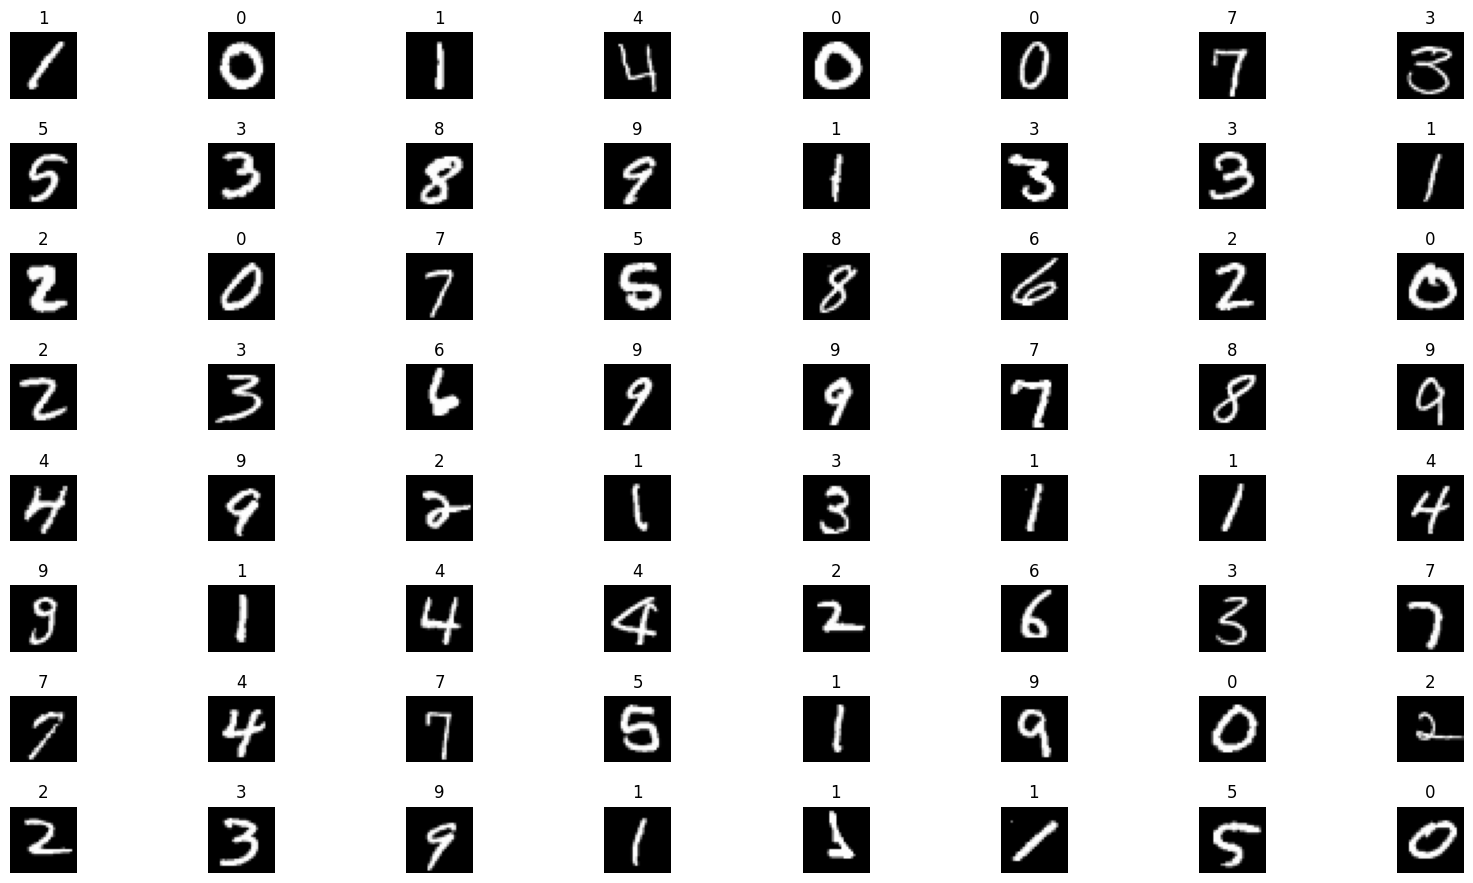

In [5]:
grid(0)

In [6]:
# Standardizing the Data

from sklearn.preprocessing import StandardScaler
y = df['label']
X = df.drop('label', axis=1)

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


In [7]:
from sklearn.decomposition import PCA

In [10]:
# Calculating co-variance matrix

cov = np.matmul(X_norm.T, X_norm)
cov

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
pixel0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10.062274,-7.320052,-5.221531,9938.59886,38045.069638,42000.0,0.0,0.0,0.0,0.0
pixel780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


In [15]:
from scipy.linalg import eigh

values, vectors = eigh(cov, eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)

vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


/var/folders/76/8q2f8pb568911qbxyw16cpxw0000gn/T/ipykernel_2826/34042223.py:3: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(cov, eigvals=(782,783))


In [23]:
new_coordinates = np.matmul(vectors, X_norm.T)

In [24]:
new_coordinates = np.vstack((new_coordinates, y)).T
coor_df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

In [25]:
coor_df.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


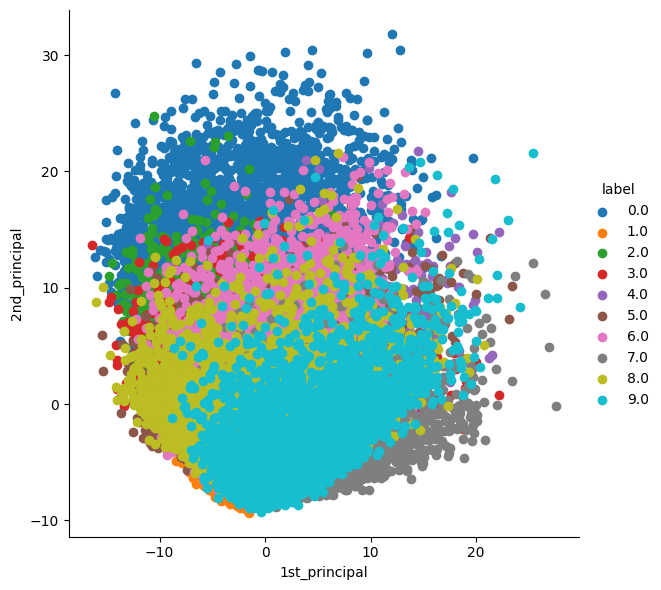

In [37]:
sns.FacetGrid(coor_df, hue="label", height=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()

# There is a lot of overlapping among classes means PCA not very good for the high dimensional dataset. Very few classes can be separated but most of them are mixed.

In [38]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 784
pca_data = pca.fit_transform(X_norm)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

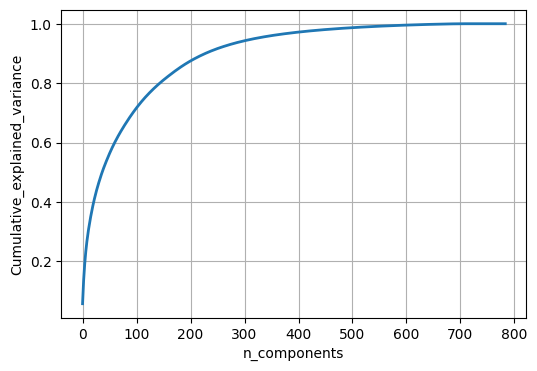

In [41]:
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative_explained_variance")
plt.show()

# 300 components explain 90% of data

In [42]:
pca = decomposition.PCA()

pca.n_components = 300
pca_data = pca.fit_transform(X_norm)

In [44]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-5.140478,-5.226445,3.887001,-0.901512,4.929111,2.035413,4.706946,-4.767184,0.230958,-1.460962,...,0.112854,-0.055434,0.306781,0.228811,0.023276,-0.292138,0.314872,-0.055342,-0.182271,-0.279091
1,19.292332,6.032996,1.308148,-2.383294,3.095188,-1.791095,-3.772790,0.153865,-4.115192,-4.299357,...,0.010581,-0.079744,-0.075465,-0.028950,0.423542,-0.281284,-0.119955,-0.198773,-0.935788,-0.283671
2,-7.644503,-1.705813,2.289326,2.241135,5.094426,-4.152058,-1.012004,1.732559,0.436261,-0.073687,...,0.247341,0.115306,0.531548,0.358617,0.211502,0.053086,0.102294,-0.255865,0.192675,0.030056
3,-0.474207,5.836139,2.008617,4.271106,2.377777,2.179913,4.398029,-0.353713,0.992309,5.501254,...,1.130680,1.332973,0.167981,-0.773518,-0.563819,-0.132925,-1.666585,0.518307,0.009168,-0.055151
4,26.559574,6.024818,0.933179,-3.012645,9.489179,-2.331195,-6.149597,-1.783637,-4.123302,-5.757361,...,-0.201050,0.425502,-0.254009,0.356694,0.091022,-0.281379,0.752545,0.437595,0.083446,-0.181662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,13.678849,-1.350366,-3.957336,-5.379672,10.875898,-5.105523,0.071920,-5.084014,-4.253677,-0.673734,...,-0.510510,-0.048385,0.228324,-0.094010,0.450024,-1.023791,0.161202,0.773182,-0.826831,0.374130
41996,-8.869582,-1.187360,2.323167,1.528830,5.798988,-2.821950,-0.351780,0.529810,0.992204,-1.126099,...,-0.037577,-0.028074,-0.008253,0.096134,-0.396292,0.060062,0.068833,-0.026372,-0.053040,-0.224653
41997,0.495391,7.076277,-12.089700,-3.223278,0.618203,0.330449,-2.128035,10.535164,-2.225962,-1.881028,...,0.138300,-0.229228,-0.033793,-0.026081,0.319817,0.272476,0.632946,-0.020119,-0.340647,0.485191
41998,2.307240,-4.344513,0.699848,10.011222,-5.586478,-5.494875,0.189789,5.450360,2.181693,-1.767516,...,0.148969,0.519472,-0.492863,-0.114566,-0.426079,-1.378010,-0.092040,0.265921,0.094444,0.511631


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=420)

In [58]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-6.879407,-0.277476,-3.909342,0.317375,-0.254611,0.084673,-4.097554,0.366495,1.441845,0.202273,...,-0.122366,-0.211669,-0.260190,0.302761,0.206582,-0.418097,-0.082198,-0.057952,-0.109427,0.440428
1,3.400070,-4.037946,-3.635827,9.310428,-3.402878,0.134046,-1.527715,2.619322,-0.530175,-0.226624,...,-0.343885,-0.186458,0.036792,-0.573274,-0.580461,0.412150,-0.899317,0.108522,0.051326,-0.526653
2,-1.692059,-5.333654,-2.987131,4.110643,7.187892,1.880979,2.814123,1.008302,1.515917,-0.041195,...,-0.350427,-0.512191,-0.727305,0.133530,0.037560,1.097145,-1.485825,0.216405,1.535592,0.392509
3,13.115915,-13.479730,-4.963370,-2.642516,2.460759,-2.992695,4.931136,3.043908,4.363754,0.687405,...,-0.547876,-0.085152,-0.258434,0.294773,-0.370530,-0.551041,-0.402589,-0.365834,0.097468,0.577076
4,9.484794,-11.310309,-1.955043,2.164722,-1.249907,6.238619,6.206200,-3.416804,2.549732,0.469239,...,-0.151077,-0.643506,-0.633884,0.110791,-1.266308,-0.803035,-0.383541,-0.551842,-0.517004,0.836033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,6.563489,-4.736805,0.135512,10.116450,-8.789904,-3.929680,3.373686,3.283090,5.799084,-5.408956,...,0.500076,-0.337868,0.208444,1.015141,-0.598870,-0.560940,0.506594,0.395346,0.406723,0.235495
33596,2.521091,5.865854,6.789225,-5.081039,-6.261647,-0.605808,-0.819875,-4.039368,1.401484,-1.777917,...,0.434537,-0.221644,0.449053,-0.034269,0.008535,-0.391547,-0.712636,0.201649,0.274433,0.448886
33597,-5.023750,-3.395453,2.811116,1.171874,7.177933,-2.575937,0.113466,-0.334893,2.333512,-1.971149,...,-0.272680,0.117645,-0.204255,-0.034035,-0.075281,0.251425,-0.212785,-0.134985,0.089378,0.322313
33598,5.194357,5.025776,3.959556,11.249735,-2.579025,-0.316199,-4.905047,-0.963250,-2.114908,6.480704,...,0.235081,-0.046625,0.435343,1.139516,-0.092906,-0.507452,0.056571,-0.033617,0.380007,1.064055


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [61]:
knn_model = KNeighborsClassifier()

In [63]:
knn_params = {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
knn_final = KNeighborsClassifier(algorithm=knn_params['algorithm'],n_neighbors=knn_params['n_neighbors'], p=knn_params['p'], weights=knn_params['weights'])

knn_final.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       803
           1       0.96      0.99      0.98       929
           2       0.95      0.93      0.94       837
           3       0.94      0.96      0.95       884
           4       0.97      0.92      0.94       836
           5       0.94      0.93      0.94       792
           6       0.96      0.98      0.97       788
           7       0.93      0.95      0.94       901
           8       0.97      0.91      0.94       809
           9       0.90      0.94      0.92       821

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



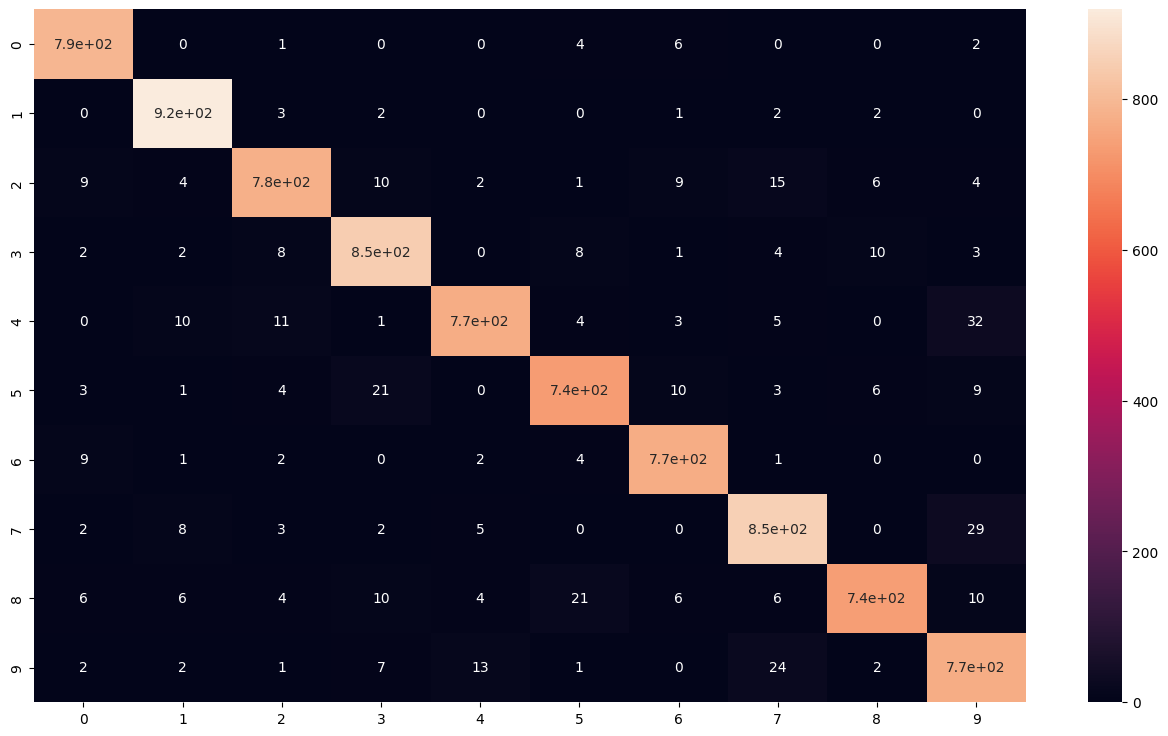

In [64]:
y_hat = knn_final.predict(X_test)
print(classification_report(y_test, y_hat))
plt.figure(figsize=(16,9))
mat = sns.heatmap(confusion_matrix(y_test, y_hat), annot=True)